In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('median-wages.csv',  encoding='cp1251')

In [4]:
data.columns

Index(['Дата;Отрасль;Значение'], dtype='object')

In [5]:
data['Дата;Отрасль;Значение'].str.split(';')

0                     [31.01.2017, Все отрасли, 24012.00]
1                     [28.02.2017, Все отрасли, 23142.00]
2                     [31.03.2017, Все отрасли, 24308.00]
3                     [30.04.2017, Все отрасли, 24035.00]
4                     [31.05.2017, Все отрасли, 25803.00]
                              ...                        
1021                [30.06.2021, Строительство, 41406.00]
1022                     [30.06.2021, Торговля, 32013.00]
1023    [30.06.2021, Транспортировка и хранение, 40632...
1024                   [30.06.2021, Услуги ЖКХ, 38984.00]
1025        [30.06.2021, Финансы и страхование, 47344.00]
Name: Дата;Отрасль;Значение, Length: 1026, dtype: object

In [6]:
new_data = data['Дата;Отрасль;Значение'].str.split(';',expand=True)
new_data

,0,1,2
0,31.01.2017,Все отрасли,24012.00
1,28.02.2017,Все отрасли,23142.00
2,31.03.2017,Все отрасли,24308.00
3,30.04.2017,Все отрасли,24035.00
4,31.05.2017,Все отрасли,25803.00
...,...,...,...
1021,30.06.2021,Строительство,41406.00
1022,30.06.2021,Торговля,32013.00
1023,30.06.2021,Транспортировка и хранение,40632.00
1024,30.06.2021,Услуги ЖКХ,38984.00


In [7]:
new_data.columns=['Дата','Отрасль','Значение']
new_data

,Дата,Отрасль,Значение
0,31.01.2017,Все отрасли,24012.00
1,28.02.2017,Все отрасли,23142.00
2,31.03.2017,Все отрасли,24308.00
3,30.04.2017,Все отрасли,24035.00
4,31.05.2017,Все отрасли,25803.00
...,...,...,...
1021,30.06.2021,Строительство,41406.00
1022,30.06.2021,Торговля,32013.00
1023,30.06.2021,Транспортировка и хранение,40632.00
1024,30.06.2021,Услуги ЖКХ,38984.00


In [8]:
new_data['Дата'] = pd.to_datetime(new_data['Дата'])

In [9]:
new_data['Значение'] = pd.to_numeric(new_data['Значение'])

In [10]:
query_type=np.array(new_data['Отрасль'].unique())

In [11]:
print('Доступный интервал дат: от', new_data.Дата.min(), 'до', new_data.Дата.max())

Доступный интервал дат: от 2017-01-31 00:00:00 до 2021-06-30 00:00:00


In [12]:
print('Введите начальную дату')
begin_Дата = input()

Введите начальную дату
2017-01-31


In [13]:
print('Введите конечную дату')
end_Дата = input()

Введите конечную дату
2021-06-30


In [14]:
print('Тип данных')
for i in range(len(query_type)):
    print(i, query_type[i])

Тип данных
0 Все отрасли
1 Административная деятельность
2 Водоснабжение
3 Гос. управление
4 Гостиницы и общепит
5 Добыча полезных ископаемых
6 Здравоохранение
7 ИТ и связь
8 Научная и проф. деятельность
9 Обрабатывающие производства
10 Образование
11 Операции с недвижимостью
12 Сельское хозяйство
13 Спорт и досуг
14 Строительство
15 Торговля
16 Транспортировка и хранение
17 Услуги ЖКХ
18 Финансы и страхование


In [15]:
print('Введите тип')
new_data_type = input()

Введите тип
0


In [16]:
new_data_type = query_type[int(new_data_type)]
print('Выбрали:', new_data_type)

Выбрали: Все отрасли


In [17]:
print('Входные данные:', begin_Дата, end_Дата, new_data_type)

Входные данные: 2017-01-31 2021-06-30 Все отрасли


In [18]:
query = new_data.query(f'Отрасль == "{new_data_type}" & Дата >= "{begin_Дата}" & Дата <= "{end_Дата}"')

<AxesSubplot:xlabel='Дата'>

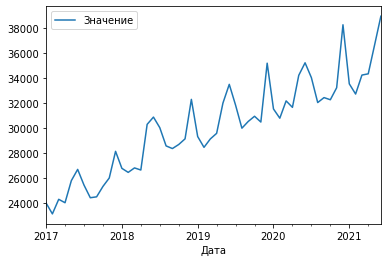

In [19]:
query.plot(x='Дата', y='Значение')

In [21]:
new_data.to_excel("new_data.xls" , index = False)